# Step 1: Defining the Study Area

In [1]:
import os
import yaml
from pathlib import Path
import geopandas as gpd
import rasterio

# -----------------------------------------------------------------------------
# Load config.yml
# -----------------------------------------------------------------------------

# Get project root (adjust based on your folder depth)
current_dir = Path(os.getcwd())
project_root = current_dir.parent.parent  # Navigate up from "Scripts/Phase1_Data_Preprocessing"

with open(project_root / "config.yml", "r") as f:
    config = yaml.safe_load(f)

# Print the config dictionary to debug


# -----------------------------------------------------------------------------
# Construct paths
# -----------------------------------------------------------------------------

# Raw data paths
raw_data_dir = project_root / config["paths"]["raw_data"]
soil_raw_dir = raw_data_dir / "GIS/Soil"  # Matches your hardcoded path structure
morocco_path = raw_data_dir / config["paths"]["morocco_path"]
tadla_plain_path = raw_data_dir / config["paths"]["tadla_plain_raw"]
tadla_plain_boundary_path = raw_data_dir / config["paths"]["tadla_plain_boundary_raw"]
soil_raw_path = raw_data_dir / config["paths"]["soil_raw"]
dem_raw_path = raw_data_dir / config["paths"]["dem_raw"]
chirps_raw_path = raw_data_dir / config["paths"]["chirps_raw"]
era5_raw_path = raw_data_dir / config["paths"]["era5_raw"]

# Processed data paths
processed_data_dir = project_root / config["paths"]["processed_data"]
output_dir = processed_data_dir / "GIS/Study_Area_Boundary"
output_path = output_dir / "Tadla_plain_common.shp"
tadla_common_path = processed_data_dir / config["paths"]["tadla_boundary_processed"]
soil_processed_path = processed_data_dir / config["paths"]["soil_processed"]
dem_processed_path = processed_data_dir / config["paths"]["dem_processed"]
slope_path = processed_data_dir / "GIS/Topography/tadla_slope.tif"
aspect_path = processed_data_dir / "GIS/Topography/tadla_aspect.tif"
chirps_processed_path = processed_data_dir / config["paths"]["chirps_processed"]
era5_processed_path = processed_data_dir / config["paths"]["era5_processed"]


# Ensure output directory exists
os.makedirs(dem_processed_path.parent, exist_ok=True)
# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)
os.makedirs(era5_processed_path.parent, exist_ok=True)

In [2]:
# Load Morocco boundary
morocco = gpd.read_file(morocco_path)

# Check the first few rows to see province names
morocco.head()

,OBJECTID,LAYER,GM_TYPE,NumCom,Code,CodeCommun,CommuneMun,CommuneGro,CodeCercle,Cercle,...,SupMapHa,SupMapKm2,Densite204,TxAccAnn94,SAU,Shape_Leng,Shape_Area,Pop2004,Pop1994,geometry
0,1,CUrb,Unknown Area Type,101,1630103,3,AIT BAHA (M),Ait Baha,1,None,...,289.0,2.89,1649.48,2.74,196,6649.301032,2.895962e+06,4767,3638,"POLYGON ((500064.146 590485.31, 500724.22 5901..."


In [3]:
print(morocco.crs)

PROJCS["Africa_Lambert_Conformal_Conic",GEOGCS["GCS_Merchich_Degree",DATUM["Merchich",SPHEROID["Clarke 1880 (IGN)",6378249.2,293.46602,AUTHORITY["EPSG","7011"]],AUTHORITY["EPSG","6261"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",33.3],PARAMETER["central_meridian",-5.4],PARAMETER["standard_parallel_1",31.72786641202],PARAMETER["standard_parallel_2",34.8717272112],PARAMETER["false_easting",500000],PARAMETER["false_northing",300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [4]:
morocco_merchiche = morocco.to_crs(epsg=26191)

<Axes: >

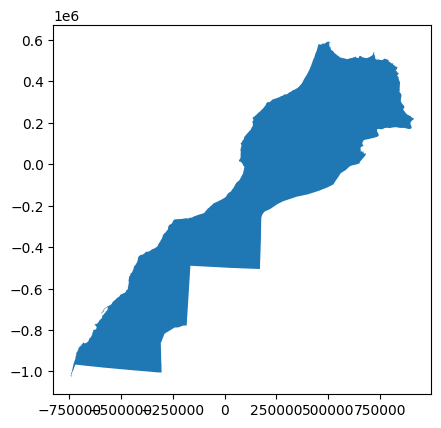

In [5]:
morocco_merchiche.plot()

In [6]:
# Load Tadla Plain shapefile
tadla_plain_polygon = gpd.read_file(tadla_plain_path)

# Check the data
print(tadla_plain_polygon)  # Show first few rows


   CC_2 GID_0     GID_1       GID_2    HASC_2        NAME_1  NAME_2    TYPE_2  \
0    81   MAR  MAR.13_1  MAR.13.1_1  MA.TD.AZ  Tadla-Azilal  Azilal  Province   

   COUNTRY ENGTYPE_2 NL_NAME_1 NL_NAME_2 VARNAME_2  \
0  Morocco  Province        NA        NA        NA   

                                            geometry  
0  POLYGON ((-7.1668 31.6115, -7.1781 31.6119, -7...  


<Axes: >

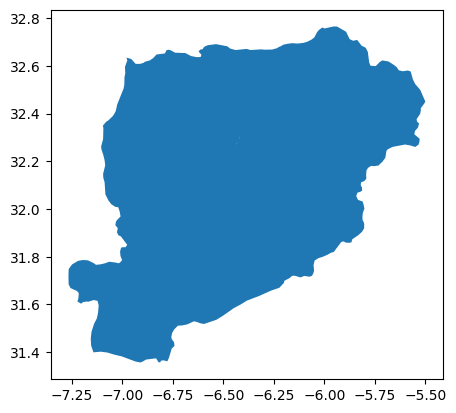

In [7]:
tadla_plain_polygon.plot()  # Plot the geometry

In [8]:
print(f"Study area size: {tadla_plain_polygon.geometry.area} m²") 

Study area size: 0    1.488719
dtype: float64 m²


C:\Users\abdel\AppData\Local\Temp\ipykernel_20540\576071636.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(f"Study area size: {tadla_plain_polygon.geometry.area} m²")


In [9]:
# Reproject to Merchich (EPSG:26191)
tadla_merchiche = tadla_plain_polygon.to_crs(epsg=26191)

# Calculate area
area_m2 = tadla_merchiche.geometry.area
print(f"Study area size: {area_m2[0]:.2f} m²")  
# Example output: "Study area size: 1300000000.00 m²"

area_ha = area_m2 / 10000
print(f"Study area size: {area_ha[0]:.2f} hectares")  
# Example output: "Study area size: 130000.00 hectares"


Study area size: 15573013765.35 m²
Study area size: 1557301.38 hectares


<Axes: >

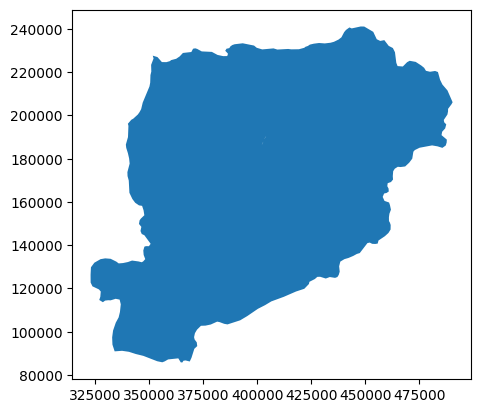

In [10]:
tadla_merchiche.plot()

In [11]:
# Load the cleaned boundary shapefile
Tadla_plain_boundary = gpd.read_file(tadla_plain_boundary_path)
# Check the current CRS
print(Tadla_plain_boundary.crs)

EPSG:4326


In [12]:
# Convert to Merchich CRS if needed
if Tadla_plain_boundary.crs != "EPSG:26191":
    Tadla_plain_boundary = Tadla_plain_boundary.to_crs(epsg=26191)


<Axes: >

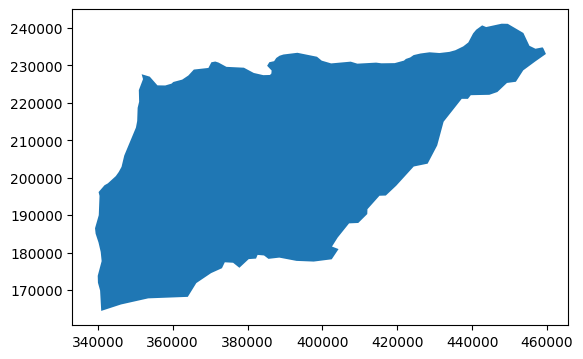

In [13]:
Tadla_plain_boundary.plot()

In [14]:
# Assume these are already loaded and in the same CRS (EPSG:26191)
# tadla_merchiche: full administrative boundary (Merchich)
# tadla_plain_polygone: digitized Tadla plain (which may be slightly off)

# Compute the common (intersecting) area between the two layers
tadla_plain = gpd.overlay(Tadla_plain_boundary, tadla_merchiche, how='intersection')

# Save the resulting common area shapefile for further analysis
tadla_plain.to_file(output_path)

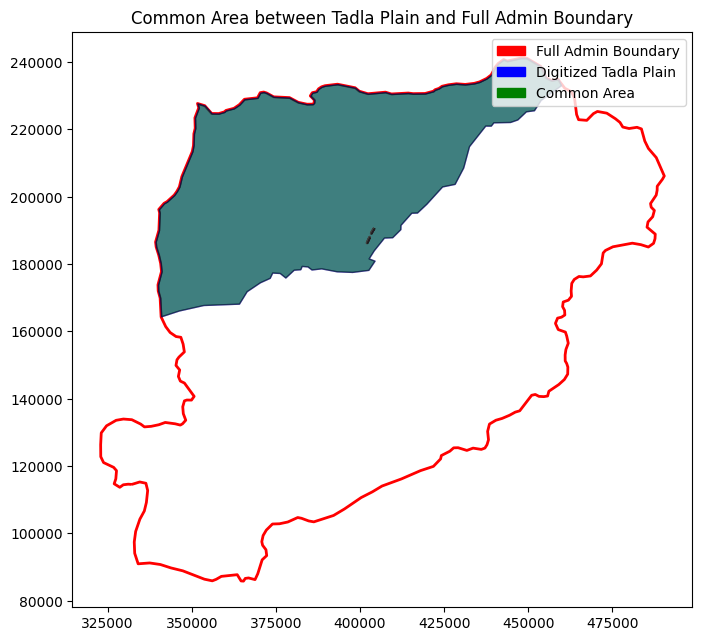

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Plot layers with explicit labels
fig, ax = plt.subplots(figsize=(8, 8))
tadla_merchiche.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)
Tadla_plain_boundary.plot(ax=ax, facecolor="blue", alpha=0.5, edgecolor="blue")
tadla_plain.plot(ax=ax, facecolor="green", alpha=0.5, edgecolor="black")

# Create custom legend
legend_labels = {
    "Full Admin Boundary": "red",
    "Digitized Tadla Plain": "blue",
    "Common Area": "green"
}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches)

plt.title("Common Area between Tadla Plain and Full Admin Boundary")
plt.show()

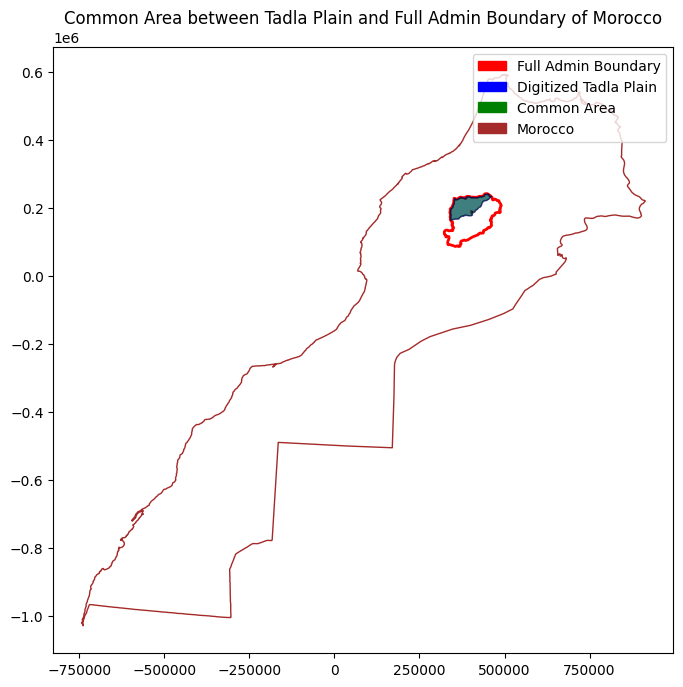

In [16]:
# Plot layers with explicit labels
fig, ax = plt.subplots(figsize=(8, 8))
tadla_merchiche.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)
Tadla_plain_boundary.plot(ax=ax, facecolor="blue", alpha=0.5, edgecolor="blue")
tadla_plain.plot(ax=ax, facecolor="green", alpha=0.5, edgecolor="black")
morocco_merchiche.plot(ax=ax, facecolor="none", edgecolor="brown", linewidth=1)

# Create custom legend
legend_labels = {
    "Full Admin Boundary": "red",
    "Digitized Tadla Plain": "blue",
    "Common Area": "green",
    "Morocco": "brown"
}
patches = [Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches)

plt.title("Common Area between Tadla Plain and Full Admin Boundary of Morocco")
plt.show()

In [17]:
tadla_plain = tadla_plain.to_crs(epsg=26191)  # Ensure projection
tadla_merchiche = tadla_merchiche.to_crs(epsg=26191)

area_plain_m2 = tadla_plain.geometry.area.sum()
area_full_m2 = tadla_merchiche.geometry.area.sum()

print(f"Tadla Plain area: {area_plain_m2:.2f} m²")
print(f"Full Admin Boundary area: {area_full_m2:.2f} m²")


Tadla Plain area: 4653651925.89 m²
Full Admin Boundary area: 15573013765.35 m²


In [18]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject

def reproject_raster(input_path, output_path, target_crs):
    with rasterio.open(input_path) as src:
        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds
        )
        metadata = src.meta.copy()
        metadata.update({
            "crs": target_crs,
            "transform": transform,
            "width": width,
            "height": height
        })

        with rasterio.open(output_path, "w", **metadata) as dest:
            reproject(
                source=rasterio.band(src, 1),
                destination=rasterio.band(dest, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=target_crs
            )

# Step 2: Downloading Soil Data (SoilGrids)

In [19]:
import geopandas as gpd

# Load Tadla boundary (EPSG:26191)
tadla = gpd.read_file(tadla_common_path)
tadla = tadla.to_crs("EPSG:26191")

# Get bounding box in Merchich coordinates
minx, miny, maxx, maxy = tadla.total_bounds
print(f"X: {minx}, {maxx}")  # Easting bounds
print(f"Y: {miny}, {maxy}")  # Northing bounds

X: 339269.02644034184, 459699.2928407953
Y: 164445.30748250836, 241159.59764125413


### 1. Defining Parameters

In [20]:
# Bounding box of Tadla Plain in EPSG:26191 (from your URL)
minx, maxx = 339200, 459750  # X (Easting)
miny, maxy = 164400, 241200  # Y (Northing)

# Soil layers and their COVERAGEIDs (adjust if needed)
layers = {
    "clay": "clay_0-5cm_mean",
    "silt": "silt_0-5cm_mean",
    "sand": "sand_0-5cm_mean",
    "ocd": "ocd_0-5cm_mean",    # Organic carbon density
    "wcs": "wcs_0-5cm_mean"     # Water content at saturation
}

### 2. Python Script to Download All Layers

In [48]:
import requests
import os

os.makedirs(soil_raw_dir, exist_ok=True)

for param, coverage_id in layers.items():
    url = (
        f"https://maps.isric.org/mapserv?map=/map/{param}.map&"
        f"SERVICE=WCS&"
        f"VERSION=2.0.1&"
        f"REQUEST=GetCoverage&"
        f"COVERAGEID={coverage_id}&"
        f"FORMAT=GEOTIFF_INT16&"  # Or GEOTIFF_FLOAT32 for raw values
        f"SUBSET=X({minx},{maxx})&"
        f"SUBSET=Y({miny},{maxy})&"
        f"SUBSETTINGCRS=http://www.opengis.net/def/crs/EPSG/0/26191&"
        f"OUTPUTCRS=http://www.opengis.net/def/crs/EPSG/0/26191"
    )
    print(url)
    
    # Download and save
    response = requests.get(url)
    if response.status_code == 200:
        output_path = os.path.join(soil_raw_dir, f"tadla_{param}.tif")
        with open(output_path, "wb") as f:
            f.write(response.content)
        print(f"Downloaded {param} to {output_path}")
    else:
        print(f"Failed to download {param}: HTTP {response.status_code}")


https://maps.isric.org/mapserv?map=/map/clay.map&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=clay_0-5cm_mean&FORMAT=GEOTIFF_INT16&SUBSET=X(339200,459750)&SUBSET=Y(164400,241200)&SUBSETTINGCRS=http://www.opengis.net/def/crs/EPSG/0/26191&OUTPUTCRS=http://www.opengis.net/def/crs/EPSG/0/26191
Downloaded clay to C:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Raw\GIS\Soil\tadla_clay.tif
https://maps.isric.org/mapserv?map=/map/silt.map&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=silt_0-5cm_mean&FORMAT=GEOTIFF_INT16&SUBSET=X(339200,459750)&SUBSET=Y(164400,241200)&SUBSETTINGCRS=http://www.opengis.net/def/crs/EPSG/0/26191&OUTPUTCRS=http://www.opengis.net/def/crs/EPSG/0/26191
Downloaded silt to C:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Raw\GIS\Soil\tadla_silt.tif
https://maps.isric.org/mapserv?map=/map/sand.map&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=sand_0-5cm_mean&FORMAT=GEOTIFF_INT16&SUBSET=X(339200,459750)&SUBSET=Y(164400,241200)&SUBSETTINGC

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\abdel\\OneDrive\\Desktop\\PFE_Project\\Data\\Raw\\GIS\\Soil\\tadla_wcs.tif'

### 3. Post-Processing

1. Unit Conversion:

    SoilGrids stores integer values as actual value × 10. 
    
    For example:
        A pixel value of 150 = 15% clay.

In [22]:
import rasterio
import numpy as np

# Process soil data

    # = src.profile
   

with rasterio.open(soil_raw_path) as src:
    clay = src.read(1)
    clay = clay.astype(np.float32) / 10  # Convert to %
    profile = src.profile.copy()
    profile.update(dtype=rasterio.float32)

    with rasterio.open(soil_processed_path, "w", **profile) as dst:
        dst.write(src.read())


2. Validate CRS Alignment

    Confirm all downloaded rasters are in EPSG:26191

In [23]:
import rasterio

with rasterio.open(soil_raw_path) as src:
    print(src.crs)  # Should print "EPSG:26191"

EPSG:26191


# Step 3: DEM Data

1. Download DEM Data

    We’ll use ALOS PALSAR Global DEM (12.5m resolution) from Google Earth Engine (GEE).

In [24]:
import geopandas as gpd

# Load Tadla boundary (ensure this path is correct)
tadla_shp_path = tadla_common_path
tadla = gpd.read_file(tadla_shp_path)

# Check current CRS
print(f"Current CRS: {tadla.crs}")  # Should be EPSG:26191 (Merchich)

# Reproject to WGS84 (EPSG:4326)
tadla_wgs84 = tadla.to_crs("EPSG:4326")

# Save reprojected shapefile
tadla_wgs84.to_file(tadla_shp_path)  # Overwrite or save to a new file

Current CRS: EPSG:26191


In [25]:
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

project_id = os.environ.get('GCP_PROJECT')
if not project_id:
    raise ValueError("The environment variable GCP_PROJECT is not set.")

print("Using project ID:", project_id)

import ee
ee.Authenticate()
ee.Initialize(project=project_id)

Using project ID: pfe-abdellahelbahli


In [26]:
# Test authentication
print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())

NASADEM: NASA NASADEM Digital Elevation 30m


In [27]:
bbox = ee.Geometry.Rectangle(
    [-7.5, 32.0, -5.5, 32.8],  # minx, miny, maxx, maxy
    proj="EPSG:4326"
)

In [28]:
# Load ALOS DEM ImageCollection and select the 'DSM' band
dem_collection = ee.ImageCollection("JAXA/ALOS/AW3D30/V3_2").select('DSM')

# Mosaic the collection into a single image (combines all tiles over Tadla)
dem = dem_collection.mosaic().clip(bbox)


In [29]:
# Export to Google Drive
task = ee.batch.Export.image.toDrive(
    image=dem,
    description='Tadla_DEM',
    folder='Tadla_Project',
    scale=12.5,
    region=bbox,
    crs="EPSG:26191",  # Merchich CRS
    fileFormat='GeoTIFF',
    maxPixels=1e13
)
task.start()

# Monitor task progress
print(f"Task ID: {task.id}")
print("Check progress at: https://code.earthengine.google.com/tasks")

Task ID: 7W6XBUE54JWHKCJS6MCTXSFB
Check progress at: https://code.earthengine.google.com/tasks


2. Preprocess DEM
    
    Once downloaded, move the DEM to Data/Raw/GIS/Topography/ and preprocess it:

In [30]:
from rasterio.mask import mask


# Load boundary and ensure it's in the same CRS as the DEM (EPSG:26191)
tadla = gpd.read_file(tadla_common_path)
if tadla.crs != "EPSG:26191":
    tadla = tadla.to_crs("EPSG:26191")

# Load DEM and check its CRS
with rasterio.open(dem_raw_path) as src:
    dem_crs = src.crs
    print(f"DEM CRS: {dem_crs}")  # Should be EPSG:26191

    # Fix 2: Reproject boundary if DEM is in a different CRS
    if tadla.crs != dem_crs:
        tadla = tadla.to_crs(dem_crs)

    # Fix 3: Validate overlap
    dem_bounds = src.bounds
    tadla_bounds = tadla.total_bounds
    print(f"DEM Bounds: {dem_bounds}")
    print(f"Tadla Bounds: {tadla_bounds}")

    if not (
        (tadla_bounds[0] > dem_bounds.left) &
        (tadla_bounds[2] < dem_bounds.right) &
        (tadla_bounds[1] > dem_bounds.bottom) &
        (tadla_bounds[3] < dem_bounds.top)
    ):
        raise ValueError("DEM and boundary do not overlap. Check their geographic extents!")

    # Clip DEM
    tadla_dem, transform = mask(src, tadla.geometry, crop=True)
    meta = src.meta.copy()
    meta.update({
        "height": tadla_dem.shape[1],
        "width": tadla_dem.shape[2],
        "transform": transform,
        "crs": dem_crs
    })

# Save clipped DEM
with rasterio.open(dem_processed_path, "w", **meta) as dest:
    dest.write(tadla_dem)
print(f"Clipped DEM saved to: {dem_processed_path}")

DEM CRS: EPSG:26191
DEM Bounds: BoundingBox(left=301450.0, bottom=156162.5, right=490500.0, top=246837.5)
Tadla Bounds: [339269.02534222 164445.30969848 459699.29170375 241159.59984315]
Clipped DEM saved to: c:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Processed\GIS\Topography\tadla_dem_processed.tif


In [31]:
print(f"DEM exists: {dem_raw_path.exists()}")
print(f"Boundary exists: {tadla_common_path.exists()}")

DEM exists: True
Boundary exists: True


### 3. Derive Slope and Aspect

1. Calculating Slope and Aspect Using GDAL

In [32]:
from osgeo import gdal
import os


In [33]:
# Enable GDAL exceptions
gdal.UseExceptions()

# Ensure output directories exist
os.makedirs(slope_path.parent, exist_ok=True)

# Calculate slope
slope = gdal.DEMProcessing(
    destName=str(slope_path),
    srcDS=str(dem_processed_path),
    processing="slope",
    format="GTiff",
    slopeFormat="degree"
)

# Calculate aspect
aspect = gdal.DEMProcessing(
    destName=str(aspect_path),
    srcDS=str(dem_processed_path),
    processing="aspect",
    format="GTiff"
)

print(f"Slope saved to: {slope_path}")
print(f"Aspect saved to: {aspect_path}")

Slope saved to: c:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Processed\GIS\Topography\tadla_slope.tif
Aspect saved to: c:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Processed\GIS\Topography\tadla_aspect.tif


# Step 4: Weather Data

1. Download CHIRPS Rainfall Data

In [34]:
import ee

# Authenticate and initialize GEE
ee.Authenticate()
ee.Initialize(project=project_id)

# Load CHIRPS data
chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")

# Define Tadla Plain geometry (use your boundary)
tadla = ee.Geometry.Rectangle([-7.5, 32.0, -5.5, 32.8])

# Filter and export
chirps_tadla = chirps.filterBounds(tadla).filterDate('2010-01-01', '2023-12-31')
task = ee.batch.Export.image.toDrive(
    image=chirps_tadla.mean(),
    description='CHIRPS_Tadla',
    folder='Tadla_Project',
    scale=5000,
    region=tadla,
    crs="EPSG:26191"
)
task.start()

2. Preprocess CHIRPS Rainfall Data

In [35]:
# Load boundary (EPSG:4326)
boundary_path = tadla_common_path
tadla = gpd.read_file(boundary_path)

# Reproject boundary to EPSG:26191 (Merchich)
tadla_merc = tadla.to_crs("EPSG:26191")

# Save reprojected boundary
tadla_merc.to_file(boundary_path)  # Overwrite or save to a new file

# Load Tadla boundary
tadla = gpd.read_file(tadla_common_path)
print(f"Boundary CRS: {tadla.crs}")  # Should be EPSG:26191 (Merchich)

Boundary CRS: EPSG:26191


In [36]:
# Load Tadla boundary
tadla = gpd.read_file(tadla_common_path)

# Load CHIRPS data
with rasterio.open(chirps_raw_path) as src:
    chirps_data, transform = mask(src, tadla.geometry, crop=True)
    meta = src.meta.copy()

# Update metadata
meta.update({
    "height": chirps_data.shape[1],
    "width": chirps_data.shape[2],
    "transform": transform,
    "crs": "EPSG:26191"
})

# Save clipped rainfall data
with rasterio.open(chirps_processed_path, "w", **meta) as dest:
    dest.write(chirps_data)

print(f"Clipped CHIRPS data saved to: {chirps_processed_path}")

Clipped CHIRPS data saved to: c:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Processed\Weather\CHIRPS_Tadla_processed.tif


3. Download ERA5 Temperature/ET Data

In [37]:
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project=project_id)


# Define the bounding box for the Tadla Plain (in WGS84)
bbox = ee.Geometry.Rectangle(
   [-7.5, 32.0, -5.5, 32.8],  # minx, miny, maxx, maxy
    proj="EPSG:4326"
)

# Load the ERA5 DAILY ImageCollection for a chosen period and filter by location
era5_daily = ee.ImageCollection("ECMWF/ERA5/DAILY") \
    .filterDate("2010-01-01", "2023-12-31") \
    .filterBounds(bbox)

# Get the first image to inspect available bands
first_img = ee.Image(era5_daily.first())
band_names = first_img.bandNames().getInfo()
print("Available bands in ERA5 DAILY dataset:", band_names)

# Choose the appropriate band.
# For example, if you're aiming for evaporation data, check for "evaporation" or "total_evaporation"
if "evaporation" in band_names:
    selected_band = "evaporation"
elif "total_evaporation" in band_names:
    selected_band = "total_evaporation"
else:
    # If neither exists, default to the first available band (or update with the correct one)
    selected_band = band_names[0]

print("Selected band:", selected_band)

# Mosaic the collection to combine overlapping images and select the chosen band, then clip to your area
era5_selected = era5_daily.select(selected_band).mosaic().clip(bbox)

# Export the resulting image to your Google Drive
task = ee.batch.Export.image.toDrive(
    image=era5_selected,
    description='ERA5_Evaporation_Export',
    folder='ERA5_Exports',  # Your Google Drive folder name
    scale=1000,             # Adjust scale (resolution) as needed
    region=bbox,
    crs="EPSG:26191",        # Exporting in WGS84; change if needed
    fileFormat='GeoTIFF',
    maxPixels=1e13
)
task.start()

print("Export task started with ID:", task.id)
print("Monitor the task at: https://code.earthengine.google.com/tasks")


Available bands in ERA5 DAILY dataset: ['mean_2m_air_temperature', 'minimum_2m_air_temperature', 'maximum_2m_air_temperature', 'dewpoint_2m_temperature', 'total_precipitation', 'surface_pressure', 'mean_sea_level_pressure', 'u_component_of_wind_10m', 'v_component_of_wind_10m']
Selected band: mean_2m_air_temperature
Export task started with ID: RUHPHUNV74HQ6JBWJR7ZPDHY
Monitor the task at: https://code.earthengine.google.com/tasks


In [38]:
# Load Tadla boundary
tadla = gpd.read_file(tadla_common_path)
# Clip ERA5 data to Tadla boundary
with rasterio.open(era5_raw_path) as src:
    era5_data, transform = mask(src, tadla.geometry, crop=True)
    meta = src.meta.copy()
    meta.update({
        "height": era5_data.shape[1],
        "width": era5_data.shape[2],
        "transform": transform,
        "crs": src.crs  # Ensure this matches the boundary CRS (EPSG:26191)
    })

# Save clipped ERA5 data
with rasterio.open(era5_processed_path, "w", **meta) as dest:
    dest.write(era5_data)

print(f"Clipped ERA5 data saved to: {era5_processed_path}")

Clipped ERA5 data saved to: c:\Users\abdel\OneDrive\Desktop\PFE_Project\Data\Processed\Weather\ERA5_Tadla_processed.tif


# Step 5: Land Use/Crop Maps (Sentinel-2)

1. Authenticate & Initialize Earth Engine

In [39]:
import ee

# Authenticate (this will open a browser window for authentication if needed)
ee.Authenticate()

# Initialize with your project settings (make sure you have set your GCP_PROJECT in your environment variables)
ee.Initialize(project=project_id)

print("Earth Engine has been initialized successfully!")


Earth Engine has been initialized successfully!


In [40]:
tadla = gpd.read_file(tadla_common_path)

# Reproject to WGS84 (EPSG:4326) if needed
if tadla.crs != "EPSG:26191":
    tadla = tadla.to_crs("EPSG:26191")

# Convert to GEE geometry
tadla_geom = ee.Geometry.Polygon(tadla.geometry[0].exterior.coords[:])

In [41]:
# Load Tadla boundary (WGS84)
tadla_geom = ee.Geometry.Polygon(
    [[-7.5, 32.0], [-5.5, 32.0], [-5.5, 32.8], [-7.5, 32.8]], 
    proj="EPSG:4326", 
    geodesic=False
)

# Reproject to EPSG:26191 (Merchich)
tadla_merc = tadla_geom.transform('EPSG:26191', 1)  # 1-meter error margin

In [42]:
def get_annual_composite(year):
    start_date = f'{year}-04-01'
    end_date = f'{year}-09-30'
    
    # Load Sentinel-2 collection
    s2_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
        .filterBounds(tadla_merc) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    
    # Harmonize bands: Select and rename critical bands (B4=Red, B8=NIR)
    s2_harmonized = s2_collection.map(
        lambda img: img.select(
            ['B4', 'B8', 'SCL'],  # Keep only Red, NIR, and Scene Classification
            ['red', 'nir', 'scl']  # Rename to avoid conflicts
        ).cast({'red': 'float', 'nir': 'float'})  # Force consistent data types
    )
    
    # Compute median composite
    composite = s2_harmonized.median()
    
    # Calculate NDVI
    ndvi = composite.expression(
        '(nir - red) / (nir + red)', 
        {'nir': composite.select('nir'), 'red': composite.select('red')}
    ).rename('NDVI')
    
    return ndvi.reproject(crs='EPSG:26191', scale=10)

In [46]:
def export_ndvi(year):
    ndvi = get_annual_composite(year)
    task = ee.batch.Export.image.toDrive(
        image=ndvi,
        description=f'Sentinel2_Tadla_NDVI_{year}',
        folder='Tadla_Project',
        scale=10,
        region=tadla_merc,
        crs='EPSG:26191',
        maxPixels=1e13,
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f"Exported {year}: Task ID {task.id}")

# Run for all years (2017–2023)
for year in range(2017, 2024):
    export_ndvi(year)

Exported 2017: Task ID JZESG5MUJ3OI2IR3ZXW2FG6W
Exported 2018: Task ID G3TGWNTGA3RGIA575FJBQMJT
Exported 2019: Task ID RMM4OX4K5MZWPHS7UDMCGSAK
Exported 2020: Task ID N3IJYFGHIYMLZQ6ZKVHPNX4H
Exported 2021: Task ID UG4PO4BPT5CH7RUFSPEXFTF6
Exported 2022: Task ID MAO57GCKKOJUCLYP37DPE5GJ
Exported 2023: Task ID 7NYZJZ3IUZSVASN4NLI4ZVP7


# Step 6 – Data Harmonization

1. Resample Coarser Data to 10m

In [ ]:
import rasterio
from rasterio.warp import reproject, Resampling

# Open soil data (250m)
with rasterio.open(soil_raw_path) as src:
    soil_data = src.read(1)
    soil_profile = src.profile.copy()

# Define target resolution (10m)
target_transform = rasterio.Affine(10, 0, src.bounds.left, 0, -10, src.bounds.top)

# Resample using bilinear interpolation
soil_resampled = np.empty((src.height * 25, src.width * 25), dtype=np.float32)  # 250m→10m (25x)
reproject(
    soil_data, soil_resampled,
    src_transform=src.transform,
    dst_transform=target_transform,
    src_crs=src.crs,
    dst_crs=src.crs,
    resampling=Resampling.bilinear
)

# Save resampled soil data
soil_profile.update({
    "transform": target_transform,
    "width": soil_resampled.shape[1],
    "height": soil_resampled.shape[0]
})
with rasterio.open(soil_processed_path, "w", **soil_profile) as dst:
    dst.write(soil_resampled, 1)